# Visualize TU-Berlin Dataset
SVG dataset is http://cybertron.cg.tu-berlin.de/eitz/projects/classifysketch/sketches_svg.zip which can be found at the original [website](https://cybertron.cg.tu-berlin.de/eitz/projects/classifysketch/).

## Transformation
According to the PointCNN paper, "Sketches are 1D curves in 2D space, thus can be more effectively represented with point clouds, rather than with 2D images." The original implementation of PointCNN provides a function that "Convert TU-Berlin sketches to points with normals".

TODO: Understand this converstion function.

In [30]:
import os
import torch
import h5py
import matplotlib.pyplot as plt
import random

In [31]:
# get the classes
dataset_path = "./data/tu_berlin"

classes_idx = {}
idx_classes = {}
with open(dataset_path + "/categories.txt", "r") as file:
    for idx, line in enumerate(file):
        class_name, class_idx = ' '.join(line.rstrip().split(' ')[:-1]), idx
        classes_idx[class_name] = int(class_idx)
        idx_classes[int(class_idx)] = class_name

print(classes_idx)

{'airplane': 0, 'alarm clock': 1, 'angel': 2, 'ant': 3, 'apple': 4, 'arm': 5, 'armchair': 6, 'ashtray': 7, 'axe': 8, 'backpack': 9, 'banana': 10, 'barn': 11, 'baseball bat': 12, 'basket': 13, 'bathtub': 14, 'bear (animal)': 15, 'bed': 16, 'bee': 17, 'beer-mug': 18, 'bell': 19, 'bench': 20, 'bicycle': 21, 'binoculars': 22, 'blimp': 23, 'book': 24, 'bookshelf': 25, 'boomerang': 26, 'bottle opener': 27, 'bowl': 28, 'brain': 29, 'bread': 30, 'bridge': 31, 'bulldozer': 32, 'bus': 33, 'bush': 34, 'butterfly': 35, 'cabinet': 36, 'cactus': 37, 'cake': 38, 'calculator': 39, 'camel': 40, 'camera': 41, 'candle': 42, 'cannon': 43, 'canoe': 44, 'car (sedan)': 45, 'carrot': 46, 'castle': 47, 'cat': 48, 'cell phone': 49, 'chair': 50, 'chandelier': 51, 'church': 52, 'cigarette': 53, 'cloud': 54, 'comb': 55, 'computer monitor': 56, 'computer-mouse': 57, 'couch': 58, 'cow': 59, 'crab': 60, 'crane (machine)': 61, 'crocodile': 62, 'crown': 63, 'cup': 64, 'diamond': 65, 'dog': 66, 'dolphin': 67, 'donut': 6

In [56]:
# Load a single data file
data_file = "./data/tu_berlin/fold_0_0.h5"
f = h5py.File(data_file, 'r')
print(f.keys())
data, label = f['data'], f['label']
print("Datas shape", data.shape)
print("Labels shape", label.shape)

<KeysViewHDF5 ['data', 'label']>
Datas shape (2048, 1024, 6)
Labels shape (2048,)


In [61]:
# Get original 2D image
random_idx = random.randint(0, len(data))
filelist_fold = "./data/tu_berlin/filelist_fold_0.txt"
svg_files = [line for line in open(filelist_fold, "r")]
svg_file_path = svg_files[random_idx]
svg_file_path = "./data/tu_berlin/svg/" + svg_file_path.rstrip()
print(svg_file_path)

svg_file = open(svg_file_path, "r")
svg_file_content = svg_file.read()
# print(svg_file_content)

# Show svg image
from IPython.display import display, SVG, Image
import cairosvg
# display(SVG(filename=svg_file_path))
cairosvg.svg2png(url=svg_file_path, write_to='./images/output6.png')



./data/tu_berlin/svg/barn/934.svg


(1024, 6)
()


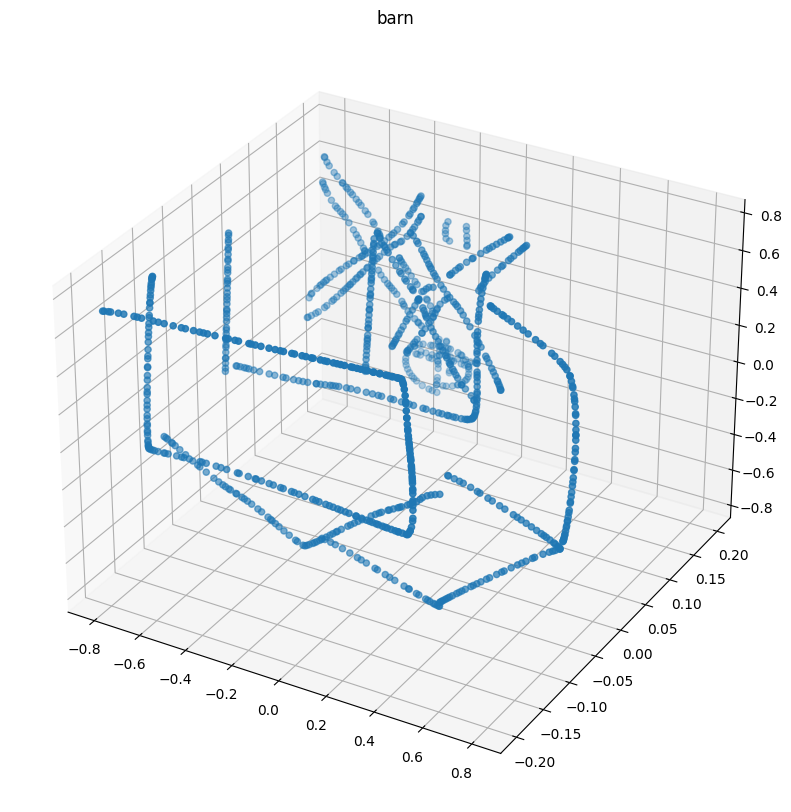

In [62]:
# Graph the translated 3D image
sample_data = data[random_idx]
sample_label = label[random_idx]
print(sample_data.shape)
print(sample_label.shape)

X, Y, Z = sample_data[:, 0], sample_data[:, 1], sample_data[:, 2]
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': '3d'}, figsize=(10, 10))
plt.title(idx_classes[sample_label])
ax.scatter(X, Y, Z)

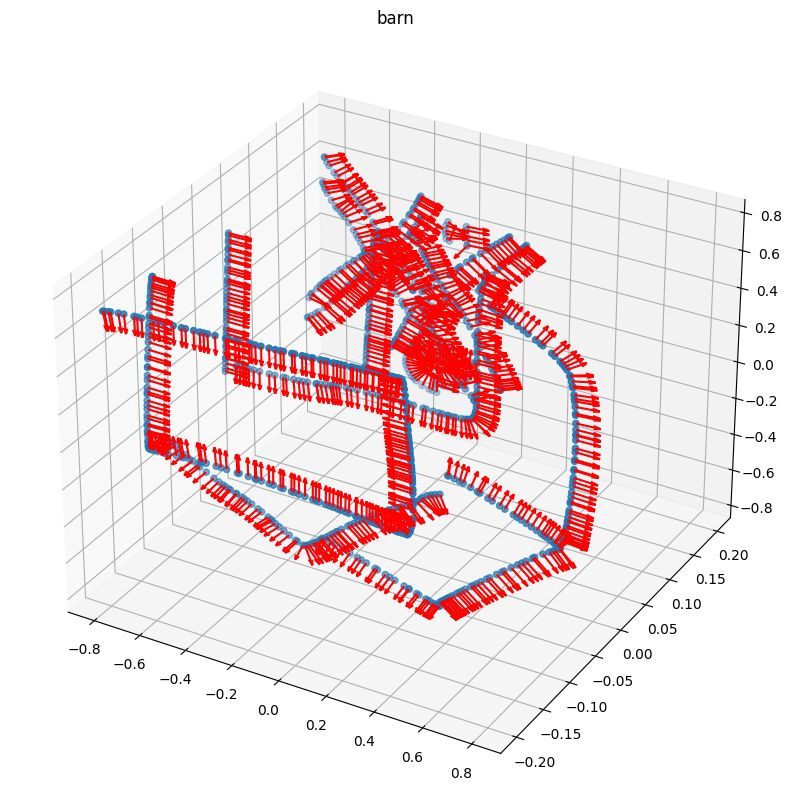

In [68]:
# Let's also graph the normals
X, Y, Z = sample_data[:, 0], sample_data[:, 1], sample_data[:, 2]
nX, nY, nZ = sample_data[:, 3], sample_data[:, 4], sample_data[:, 5]

fig, ax = plt.subplots(1, 1, subplot_kw={'projection': '3d'}, figsize=(10, 10))
plt.title(idx_classes[sample_label])
ax.scatter(X, Y, Z)
ax.quiver(X, Y, Z, nX, nY, nZ, length=0.1, normalize=True, color="red")
plt.show()